## Helper functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams.update({
    "text.usetex": True,
    'mathtext.fontset': 'stix',
    "font.family": 'STIXGeneral',
    "axes.labelpad": 8.0
})

# helper functions
def pAct(C, Ka=1.4*10**(-4), Ki=5.3*10**(-7), delE=4.5):
    """ probability of repressor/activator being active
    
    Parameters:
        - C: inducer concentration
        - Ka: dissociation constant in active state
        - Ki: dissociation constant in inactive state
        - delE: energy difference between inactive and active state
    """

    p = (1 + C/Ka)**2 / ((1 + C/Ka)**2 + np.exp(-delE)*(1 + C/Ki)**2)
    return p

## Fig. 12: Comparison between thermodynamics and Hill function

In [2]:
def evolveAutoActivation(A, p, r0, r1, r2, w, delt):
    
    dAdt = - A + r0/(1 + 2*(p*A) + w*(p*A)**2) + r1*(2*p*A)/(1 + 2*(p*A) + w*(p*A)**2) + \
            r2*(w*(p*A)**2)/(1 + 2*(p*A) + w*(p*A)**2)
    
    Anew = A + dAdt * delt

    return Anew


def steadyStateAutoActivation(p, r0, r1, r2, w):

    coeff = [w*p**2, 2*p-r2*w*p**2, 1-2*r1*p, -r0]

    return np.roots(coeff)

def steadyStateKd(Kd, r0, r1, r2, w):

    coeff = [-w/Kd**2, -2/Kd + w*r2/Kd**2, 2*r1/Kd - 1, r0]
    roots = np.roots(coeff)
    good_roots = np.real(roots[np.isreal(roots)])
    good_roots = np.sort(good_roots[good_roots >= 0])

    return good_roots

def steadyStateAutoActivationHill(p, r0, r2, n):

    coeff = np.zeros(n+2)
    coeff[0] = -p**n
    coeff[1] = r2*p**n
    coeff[-2] = -1
    coeff[-1] = r0

    return np.roots(coeff)

def thermo_weights(x, w):

    weights = [1/(1 + 2*x + w*x**2), 2*x/(1 + 2*x + w*x**2), w*x**2/(1 + 2*x + w*x**2)]

    return weights

def hill_weights(x, n):

    weights = [1/(1 + x**n), x**n/(1 + x**n)]

    return weights

### Plotting functions

In [3]:
def plot_bifurcation_curve_thermo(ax, r0, r1, r2, w, cmin=-7, cmax=-4, length=200, label=r"Thermodynamics", color="C0"):

    # range of effector concentrations to be sampled
    Cs = np.logspace(cmin, cmax, length)
    # map into pAct
    p_acts = pAct(Cs)

    # find the steady states corresponding to each c
    Rs = []
    for i in range(len(p_acts)):
        Rs.append(steadyStateAutoActivation(p=p_acts[i], r0=r0, r1=r1, r2=r2, w=w))

    # select real and positive roots
    Rs = np.concatenate(Rs)
    real_Rs = np.real(Rs[np.isreal(Rs)])
    real_Cs = np.repeat(Cs, 3)[np.isreal(Rs)]

    positive_Rs = real_Rs[real_Rs >= 0]
    positive_Cs = real_Cs[real_Rs >= 0]

    # plot the bifurcation curve
    ax.scatter(positive_Cs, positive_Rs, s=10, label=label, c=color)

def plot_bifurcation_curve_Hill(ax, r0, r2, n, cmin=-7, cmax=-4, length=200, label=r"Hill function", color="C1"):

    # range of effector concentrations to be sampled
    Cs = np.logspace(cmin, cmax, length)
    # map into pAct
    p_acts = pAct(Cs)

    # find the steady states corresponding to each c
    Rs = []
    for i in range(len(p_acts)):
        Rs.append(steadyStateAutoActivationHill(p=p_acts[i], r0=r0, r2=r2, n=n))

    # select real and positive roots
    Rs = np.concatenate(Rs)
    real_Rs = np.real(Rs[np.isreal(Rs)])
    real_Cs = np.repeat(Cs, n+1)[np.isreal(Rs)]

    positive_Rs = real_Rs[real_Rs >= 0]
    positive_Cs = real_Cs[real_Rs >= 0]

    # plot the bifurcation curve
    ax.scatter(positive_Cs, positive_Rs, s=10, label=label, c=color)

### (A): contradiction of bistability prediction

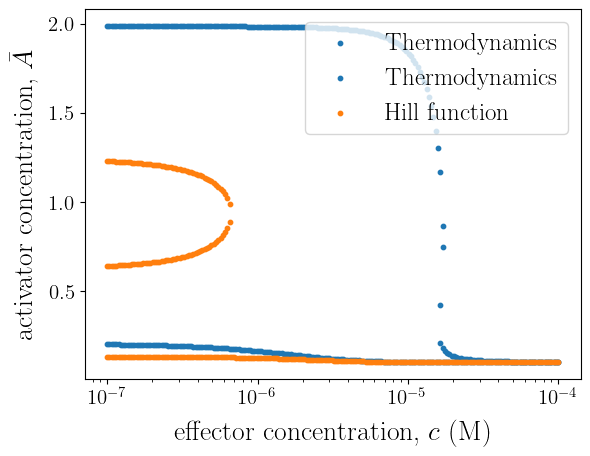

In [4]:
fig, ax = plt.subplots()

r0, r2 = 0.1, 2

# plot first thermo bifurcation curve
r1, w = 0.1, 2
plot_bifurcation_curve_thermo(ax, r0, r1, r2, w)

# plot second thermo bifurcation curve
r1, w = 1, 100
plot_bifurcation_curve_thermo(ax, r0, r1, r2, w)

# plot Hill bifurcation curve
plot_bifurcation_curve_Hill(ax, r0, r2, 2)

plt.xscale("log")
plt.legend(loc="upper right")
plt.xlabel(r"effector concentration, $c$ (M)")
plt.ylabel(r"activator concentration, $\bar{A}$")
plt.show()


### (B): flexibility of EC50

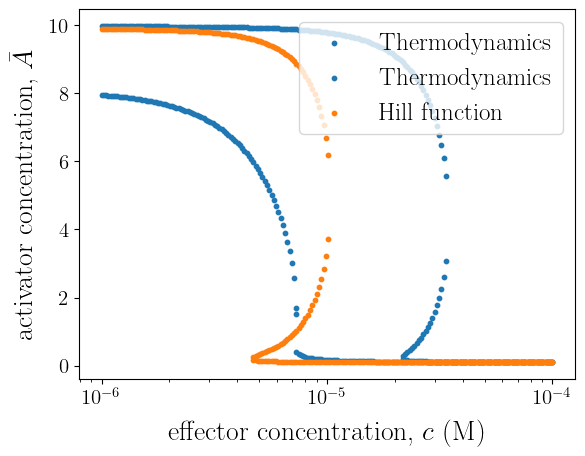

In [5]:
fig, ax = plt.subplots()

r0, r2 = 0.1, 10

# plot first thermo bifurcation curve
r1, w = 1, 1
plot_bifurcation_curve_thermo(ax, r0, r1, r2, w, cmin=-6)

# plot second thermo bifurcation curve
r1, w = 1, 50
plot_bifurcation_curve_thermo(ax, r0, r1, r2, w, cmin=-6)

# plot Hill bifurcation curve
plot_bifurcation_curve_Hill(ax, r0, r2, 2, cmin=-6)

plt.xscale("log")
plt.legend(loc="upper right")
plt.xlabel(r"effector concentration, $c$ (M)")
plt.ylabel(r"activator concentration, $\bar{A}$")
plt.show()


## Fig. 30: SI comparison of weights

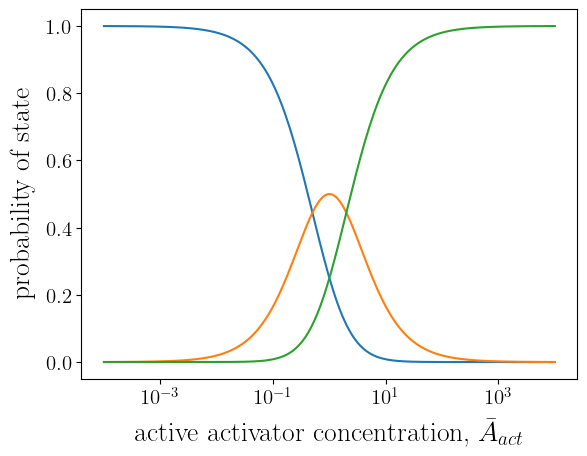

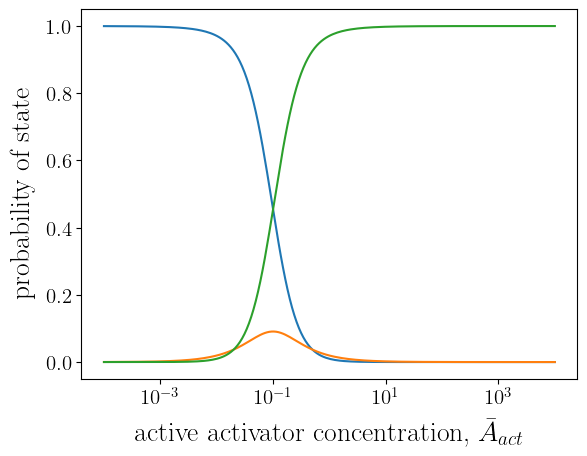

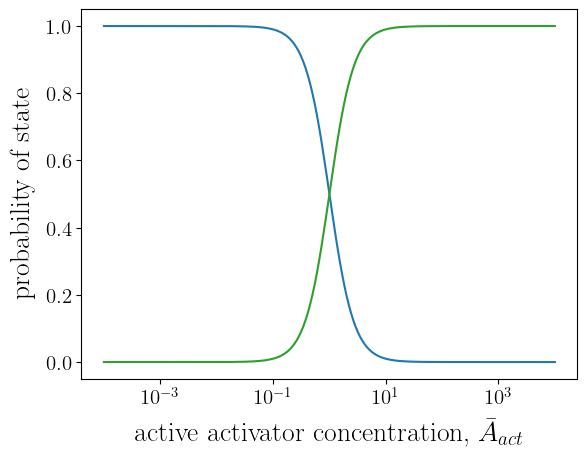

In [6]:
length = 200

xs = np.logspace(-4, 4, length)

# thermodynamic probability of states, w=1
weight_th_wlow = thermo_weights(xs, 1)
plt.plot(xs, weight_th_wlow[0])
plt.plot(xs, weight_th_wlow[1])
plt.plot(xs, weight_th_wlow[2])
plt.xlabel(r"active activator concentration, $\bar{A}_{act}$")
plt.ylabel(r"probability of state")
plt.xscale("log")
plt.show()
# thermodynamic probability of states, w=100
weight_th_whigh = thermo_weights(xs, 100)
plt.plot(xs, weight_th_whigh[0])
plt.plot(xs, weight_th_whigh[1])
plt.plot(xs, weight_th_whigh[2])
plt.xlabel(r"active activator concentration, $\bar{A}_{act}$")
plt.ylabel(r"probability of state")
plt.xscale("log")
plt.show()
# Hill function probability of states, n=2
weight_hill = hill_weights(xs, 2)
plt.plot(xs, weight_hill[0])
plt.plot(xs, weight_hill[1], c="C2")
plt.xlabel(r"active activator concentration, $\bar{A}_{act}$")
plt.ylabel(r"probability of state")
plt.xscale("log")
plt.show()

## Fig. 31. SI fixed EC50 for Hill function

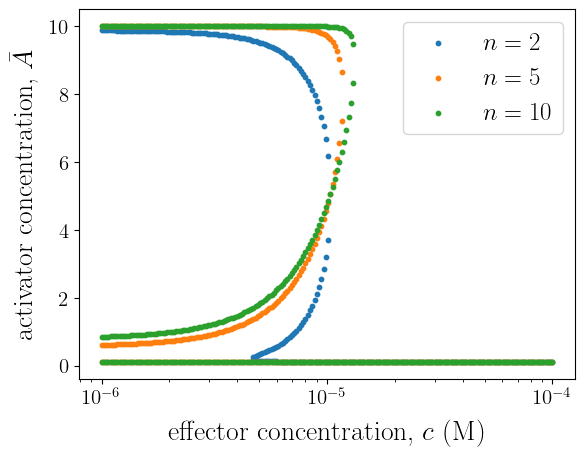

In [7]:
fig, ax = plt.subplots()

r0, r2 = 0.1, 10

# plot Hill bifurcation curve
plot_bifurcation_curve_Hill(ax, r0, r2, 2, cmin=-6, color="C0", label=r"$n=2$")
plot_bifurcation_curve_Hill(ax, r0, r2, 5, cmin=-6, color="C1", label=r"$n=5$")
plot_bifurcation_curve_Hill(ax, r0, r2, 10, cmin=-6, color="C2", label=r"$n=10$")

plt.xscale("log")
plt.legend(loc="upper right")
plt.xlabel(r"effector concentration, $c$ (M)")
plt.ylabel(r"activator concentration, $\bar{A}$")
plt.show()
